In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
name ='IZOSTAL'

In [11]:
df = pd.read_html('https://www.biznesradar.pl/raporty-finansowe-bilans/'+name+',Q')[2].drop([
                                                                0,3,5,6,7,8,14,15,18,19,20,21,23,25,27,31,33,34]).set_index('Unnamed: 0')
shares = pd.read_html('https://www.biznesradar.pl/wskazniki-wartosci-rynkowej/'+name)[0].drop([0,2,3,4,5,6,7,8,9
                                                                                             ,10,11,12,13,14,15]).set_index('Unnamed: 0') 
zis =  pd.read_html('https://www.biznesradar.pl/raporty-finansowe-rachunek-zyskow-i-strat/'+name+',Q')[2].drop([
                                                                                    0,6,7,8,9,10,11,12,13,15,17]).set_index('Unnamed: 0')
flow = pd.read_html('https://www.biznesradar.pl/raporty-finansowe-przeplywy-pieniezne/'+name+',Q')[0].drop([
                                                                                                          0,6,8]).set_index('Unnamed: 0')


del df["Unnamed: "+str(len(df.columns))]  
del shares["Unnamed: "+str(len(shares.columns))] 
del zis["Unnamed: "+str(len(zis.columns))]
del flow["Unnamed: "+str(len(flow.columns))]

df = df.drop(df.columns[0:4],axis=1)
shares = shares.drop(shares.columns[0:(len(shares.columns)-len(df.columns))]   ,axis=1)
zis = zis.drop(zis.columns[0:(len(zis.columns)-len(df.columns))]   ,axis=1)
flow = flow.drop(flow.columns[0:(len(flow.columns)-len(df.columns))]   ,axis=1)
df.columns = df.columns.str.slice(start=2, stop=7)
flow.columns = zis.columns = shares.columns = df.columns


for i in range(len(df.columns)):
    df[str(df.columns[i])] = df[str(df.columns[i])].str.replace('(k/k).*','')
    df[str(df.columns[i])] = df[str(df.columns[i])].str.replace('(r/r).*','')
    zis[str(zis.columns[i])] = zis[str(zis.columns[i])].str.replace('(k/k).*','')
    zis[str(zis.columns[i])] = zis[str(zis.columns[i])].str.replace('(r/r).*','')
    flow[str(flow.columns[i])] = flow[str(flow.columns[i])].str.replace('(k/k).*','')
    flow[str(flow.columns[i])] = flow[str(flow.columns[i])].str.replace('(r/r).*','')
    
    df[str(df.columns[i])] = df[str(df.columns[i])].str.replace(' ','')
    shares[str(shares.columns[i])] = shares[str(shares.columns[i])].str.replace(' ','')
    zis[str(zis.columns[i])] = zis[str(zis.columns[i])].str.replace(' ','')
    flow[str(flow.columns[i])] = flow[str(flow.columns[i])].str.replace(' ','')
    
df = df.apply(pd.to_numeric, errors='ignore')
shares = shares.apply(pd.to_numeric, errors='ignore')
zis = zis.apply(pd.to_numeric, errors='ignore')
flow = flow.apply(pd.to_numeric, errors='ignore')

#display(flow)
#display(zis)
df

,11/Q1,11/Q2,11/Q3,11/Q4,12/Q1,12/Q2,12/Q3,12/Q4,13/Q1,13/Q2,...,18/Q4,19/Q1,19/Q2,19/Q3,19/Q4,20/Q1,20/Q2,20/Q3,20/Q4,21/Q1
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
Aktywa trwałe,102523.0,110649,121026.0,132200,138498,141461,140545,137731,137503,137588,...,172359,179894,183638,185940,187322,187474,186600,184906,187442,188332
Wartości niematerialne i prawne,170.0,172,159.0,199,179,168,157,185,171,162,...,1590,1552,1515,1481,1445,1495,1466,1440,1414,1406
Rzeczowe składniki majątku trwałego,101967.0,110073,120450.0,131407,137431,136899,136099,136256,136212,136864,...,166049,172685,177007,179839,180522,179700,178751,176914,178994,179876
Aktywa obrotowe,132801.0,114282,101496.0,140226,163896,109594,155722,143072,170188,139682,...,391922,331870,285154,392399,350531,438144,334916,371720,352887,313254
Zapasy,39690.0,36081,24004.0,45909,36301,34212,61312,59972,74355,45130,...,215562,124624,151961,244014,227050,220997,149305,178246,167862,96229
Należności krótkoterminowe,66374.0,74618,61688.0,58093,107414,63786,93605,51851,94363,93949,...,173952,189808,128349,138621,118274,213403,164689,176919,182688,213116
Inwestycje krótkoterminowe,26737.0,3583,15804.0,36224,20181,11596,805,31249,1470,603,...,2408,17438,4844,9764,5207,3744,20922,16555,2337,3909
Środki pieniężne i inne aktywa pieniężne,26737.0,3583,15804.0,35683,20181,11376,634,23873,997,603,...,2408,17335,4844,9764,5207,3744,20922,16555,1849,3909
Aktywa razem,235324.0,224931,222522.0,272426,302394,251055,296267,280803,307691,277270,...,564281,511764,468792,578339,537853,625618,521516,556626,540329,501586


In [12]:
class ZIS:
    def __init__(self , df):
        self.time = df.columns
        self.shares = shares.iloc[0]
        self.year = [ self.time[i] for i in range(3,len(self.time),4)]
        self.year = np.append(self.year, '21/Q4' )
        self.revenue = zis.iloc[0]
        self.Production_cost = zis.iloc[1]
        self.Sell_profit = zis.iloc[4]
        self.Gross_profit = zis.iloc[5]
        self.net_profit = zis.iloc[6]
        self.operating_financial_score = zis.iloc[5] - zis.iloc[4]
        self.Last4_profit = []
        self.Last4_revenue = []
        self.Revenue_year = [ np.sum(self.revenue[i:i+4]) for i in range(0,len(self.shares),4) ]
        self.Profit_year = [np.sum(self.net_profit[i:i+4]) for i in range(0,len(self.shares),4) ]
        self.Last4_profit = [ np.sum(self.net_profit[i-4:i]) for i in range(4,len(self.shares)+1) ]
        self.Last4_revenue = [ np.sum(self.revenue[i-4:i]) for i in range(4,len(self.shares)+1) ]
            
        self.Noncurrent_assets = df.iloc[0]
        self.Nontangible = df.iloc[1]
        self.Tangible = df.iloc[2]
        self.Current_assets = df.iloc[3]
        self.Supplies = df.iloc[4]  # 4 - supplies
        self.cash = df.iloc[7]
        self.Assets_total = df.iloc[8]
        self.Short_debt = df.iloc[13]
        self.Loans = df.iloc[11] + df.iloc[15]
        
        self.Amortization = flow.iloc[1]
        self.FreeCashFlow = flow.iloc[8]
        self.Operating_flow = flow.iloc[0]
        self.Financial_flow = flow.iloc[4]
        
        self.Assets_year_mean = [ np.mean(self.Assets_total[i:i+4]) for i in range(0,len(self.shares),4) ]
        self.Supplies_year_mean = [ np.mean(self.Supplies[i:i+4]) for i in range(0,len(self.shares),4) ]
        self.Equity = df.iloc[9]
        self.beta = self.Equity[3:len(self.Equity)]/self.Last4_revenue
        self.ROE = self.Last4_profit/self.Equity[3:len(self.Equity)]
        self.Assets_productivity = [ self.Revenue_year[i]/self.Assets_year_mean[i]*100 for i in range(0,len(self.Revenue_year))]
        self.Supply_productivity = [ self.Profit_year[i]/self.Supplies_year_mean[i]*100 for i in range(0,len(self.Revenue_year))]
        self.Current_ratio = self.Current_assets/self.Short_debt
        self.Cash_cover = self.cash/self.Short_debt
        self.SupplyCover = (self.Supplies)/self.Short_debt
        self.ROI = (self.cash+self.Supplies)/self.Loans
        
    def equity(self):
        self.fig = plt.figure(figsize = (20,15) , dpi=80)
        self.ax = plt.subplot(311)
        self.ax.spines["top"].set_visible(False)
        self.ax.spines["right"].set_visible(False)
        self.ax.yaxis.grid(True)
        self.ax.set_axisbelow(True)
        
        plt.bar(self.time, self.Equity/self.shares*1000, 
                label='equity/share ='"$"+str(round(self.Equity[len(self.shares)-1]/self.shares[len(self.shares)-1]*1000,2))+"$")
        plt.plot(self.time, self.cash/self.shares*1000 , color='green', linewidth = 3, 
                 label='cash/share ='"$"+str(round(self.cash[len(self.shares)-1]/self.shares[len(self.shares)-1]*1000,2))+"$")
        
        plt.xticks(rotation = 50 , fontsize = 12)
        plt.legend(loc='best' , fontsize = 12 )
        self.ax = plt.subplot(312)
        self.ax.spines["top"].set_visible(False)
        self.ax.spines["right"].set_visible(False)
        self.ax.yaxis.grid(True)
        self.ax.set_axisbelow(True)
        
        plt.bar(self.time[3:len(self.shares)], self.ROE*100, color='darkgreen')
        self.ax.set_title('ROE')
        self.ax.set_ylabel('[%]')
        plt.xticks(rotation = 50 , fontsize = 12)
        plt.tight_layout(pad=3)
        self.ax = plt.subplot(313)
        self.ax.spines["top"].set_visible(False)
        self.ax.spines["right"].set_visible(False)
        self.ax.yaxis.grid(True)
        self.ax.set_axisbelow(True)
        
        plt.plot(self.time[3:len(self.shares)], self.beta[3:len(self.shares)]*self.ROE*100 )
        self.ax.set_title('ROE*BETA')
        self.ax.set_ylabel('[%]')
        plt.xticks(rotation = 50 , fontsize = 12)
        plt.tight_layout(pad=3)
        
    def Assets(self):
        self.fig = plt.figure(figsize = (20,15) , dpi=80)
        self.ax = plt.subplot(211)
        self.ax.spines["top"].set_visible(False)
        self.ax.spines["right"].set_visible(False)
        self.ax.yaxis.grid(True)
        self.ax.set_axisbelow(True)
        self.ax.set_title('Assets' , fontsize = 20)
        plt.bar(self.time, self.Assets_total/1000000, label='Total Assets')
        plt.plot(self.time, self.Current_assets/1000000, color='firebrick',label='Current Assets')
        plt.plot(self.time, self.cash/1000000, color = 'lime', label='Cash')
        self.ax.set_ylabel('w mld')
        plt.xticks(rotation=50)
        self.ax = plt.subplot(212)
        self.ax.spines["top"].set_visible(False)
        self.ax.spines["right"].set_visible(False)
        self.ax.yaxis.grid(True)
        self.ax.set_axisbelow(True)
        plt.plot(self.year , self.Assets_productivity, label='Assets productivity = revenue/assets')
        plt.plot(self.year , self.Supply_productivity, label = 'Supplies productivity = profit/supplies')
        plt.legend(loc='best')
        self.fig = plt.figure(figsize = (20,15) , dpi=80)
        self.ax = plt.subplot(211)
        self.ax.spines["top"].set_visible(False)
        self.ax.spines["right"].set_visible(False)
        self.ax.yaxis.grid(True)
        self.ax.set_axisbelow(True)
        plt.plot(self.time , (self.Current_assets-self.Short_debt)/self.Assets_total*100, label='(Current assets-Short debt)/Total Assets')
        #plt.plot(self.time , self.Supplies/self.Current_assets*100, label='Supplies/Current assets')
        plt.legend(loc='best' , fontsize = 12 )
        plt.xticks(rotation=50)
        
    def Cover(self):
        self.fig = plt.figure(figsize = (20,15) , dpi=80)
        self.ax = plt.subplot(211)
        self.ax.spines["top"].set_visible(False)
        self.ax.spines["right"].set_visible(False)
        self.ax.yaxis.grid(True)
        self.ax.set_axisbelow(True)
        self.ax.set_title('Liquidity' , fontsize=20)
        plt.plot(self.time, self.Current_ratio, label='Current ratio')
        plt.plot(self.time, self.SupplyCover, label='Supply cover')
        plt.plot(self.time, self.Cash_cover, label='Cash cover')
        plt.legend(loc='best')
        plt.xticks(rotation = 50)
        self.ax = plt.subplot(212)
        self.ax.spines["top"].set_visible(False)
        self.ax.spines["right"].set_visible(False)
        self.ax.yaxis.grid(True)
        self.ax.set_axisbelow(True)
        plt.bar(self.time, self.Supplies/self.Production_cost, label= 'Supply/Production Costs')
        plt.plot(self.time, self.ROI, label='ROI= (Cash+supplies)/Loans')
        # plt.plot(self.time, self.Loans)
        plt.xticks(rotation = 50)
        plt.legend(loc='best')


    def Flow(self):
        self.fig = plt.figure(figsize = (20,15) , dpi=80)
        self.ax = plt.subplot(211)
        self.ax.spines["top"].set_visible(False)
        self.ax.spines["right"].set_visible(False)
        self.ax.yaxis.grid(True)
        self.ax.set_axisbelow(True)
        self.ax.set_title('Flow' , fontsize=20)
        plt.plot(self.time , self.FreeCashFlow/self.shares*1000, marker='o', label='Free Cash Flow')  
        plt.legend(loc='best' , fontsize = 15)
        plt.xticks(rotation = 50)
        self.ax = plt.subplot(212)
        self.ax.spines["top"].set_visible(False)
        self.ax.spines["right"].set_visible(False)
        self.ax.yaxis.grid(True)
        self.ax.set_axisbelow(True)
        plt.plot(self.time , self.operating_financial_score/self.shares*100, marker='o', label='Operating and financial score')
        plt.legend(loc='best' , fontsize = 15)
        plt.xticks(rotation = 50)

None

None

None

None

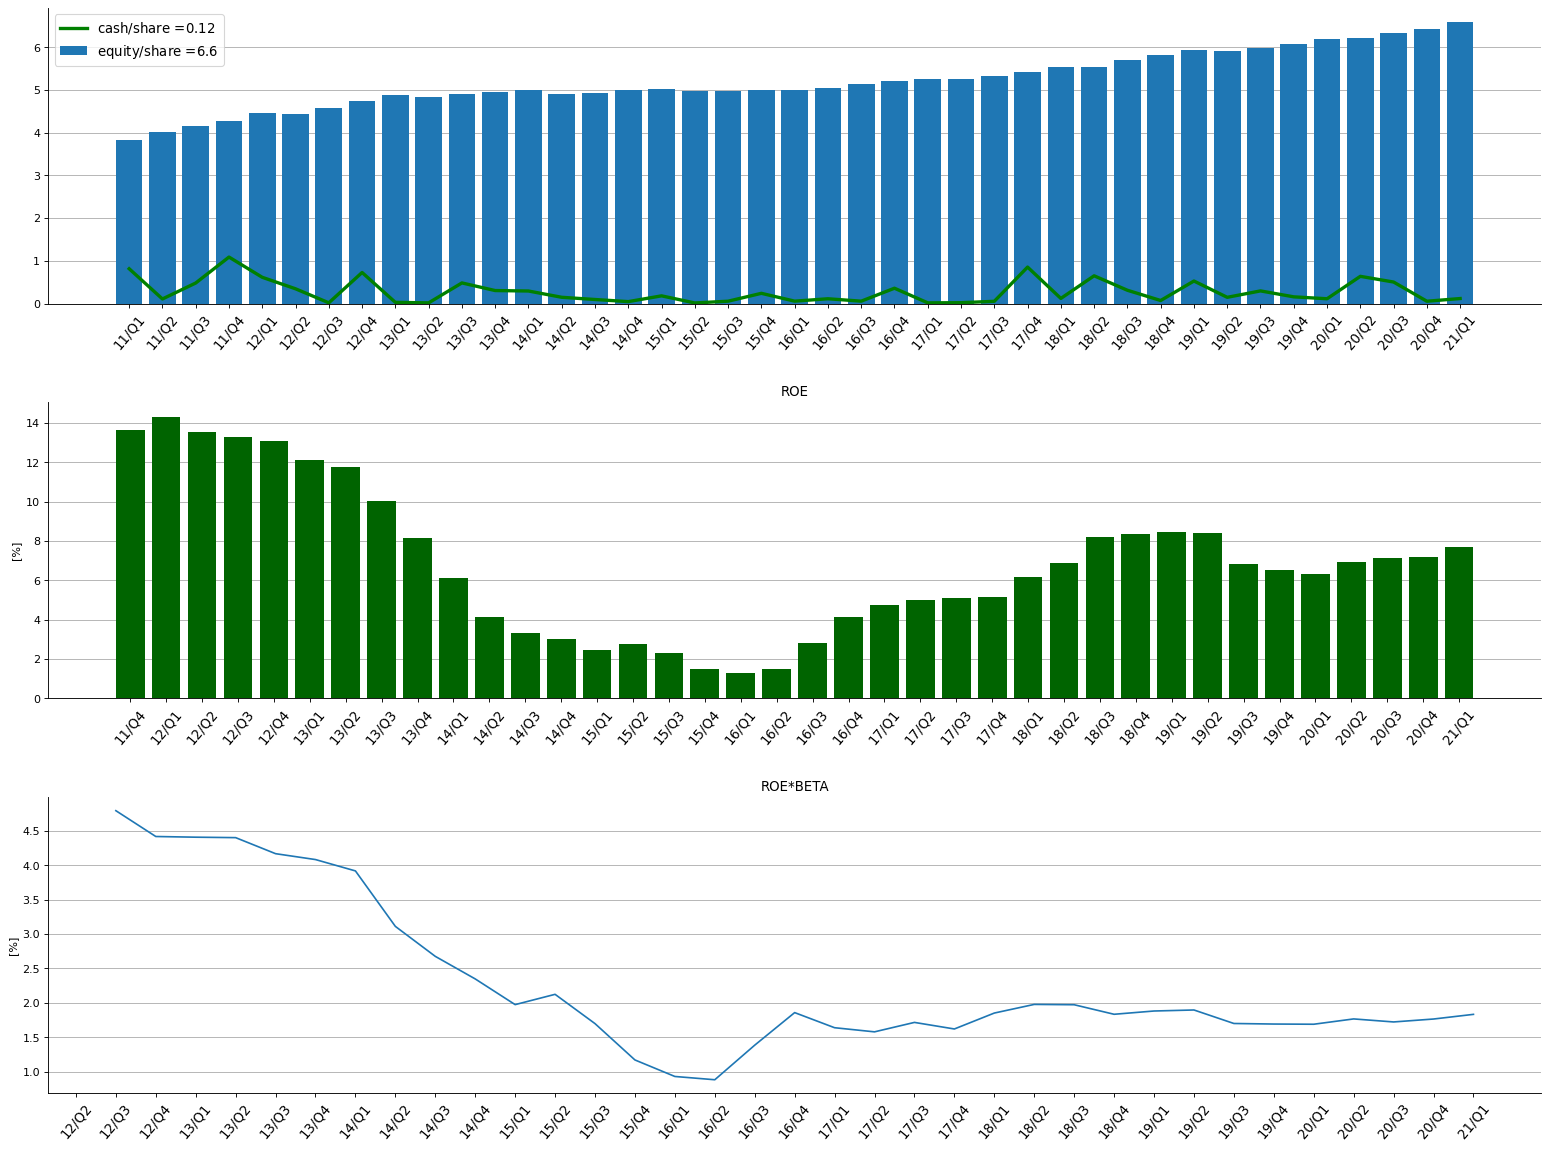

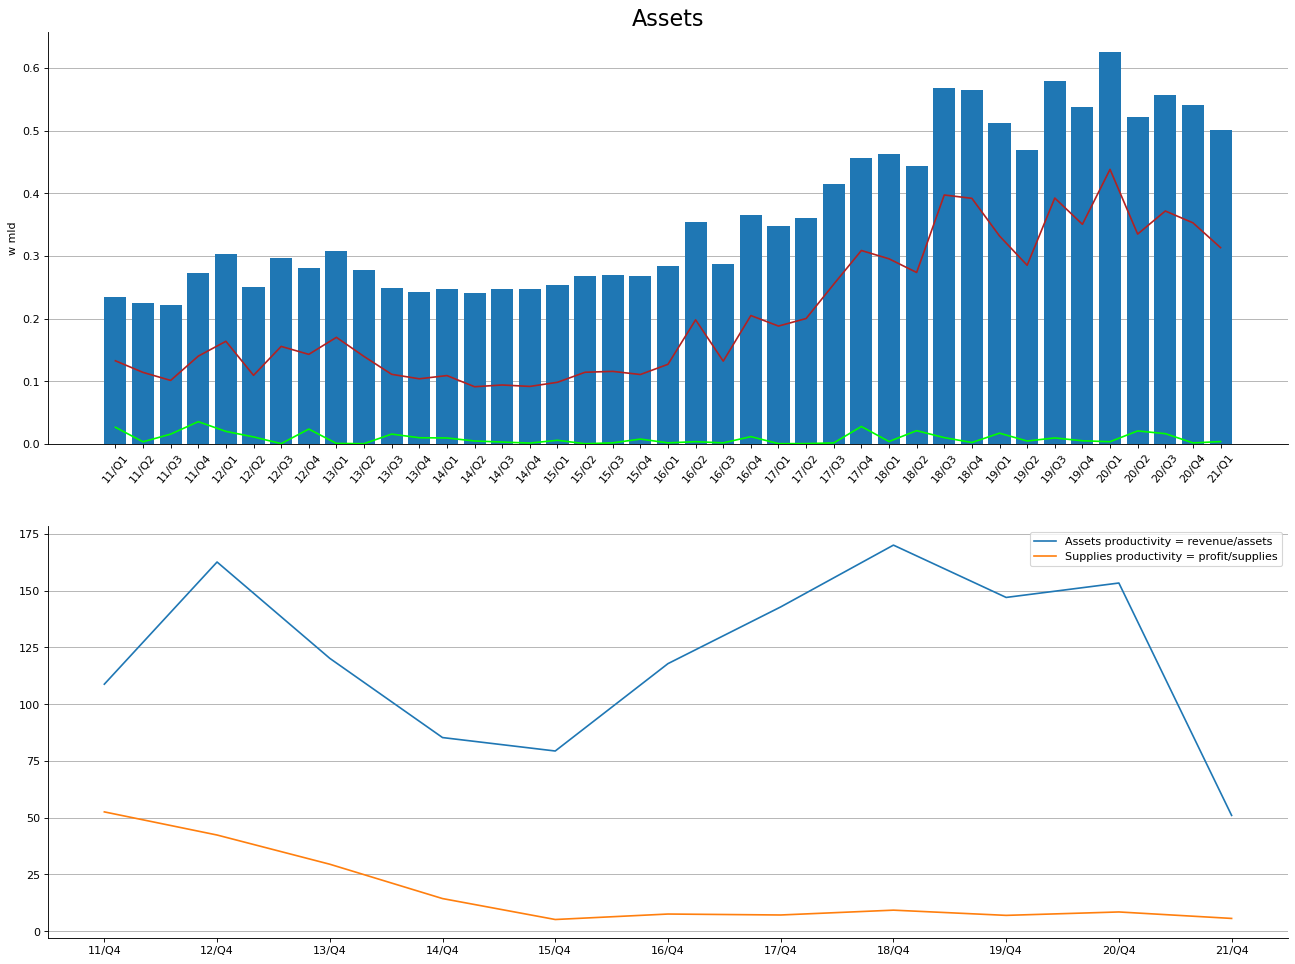

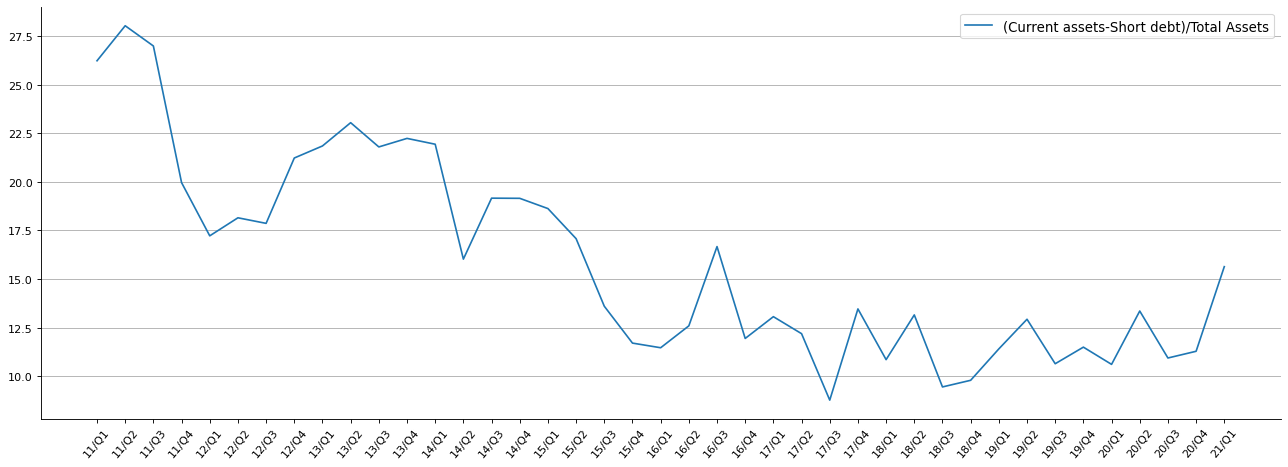

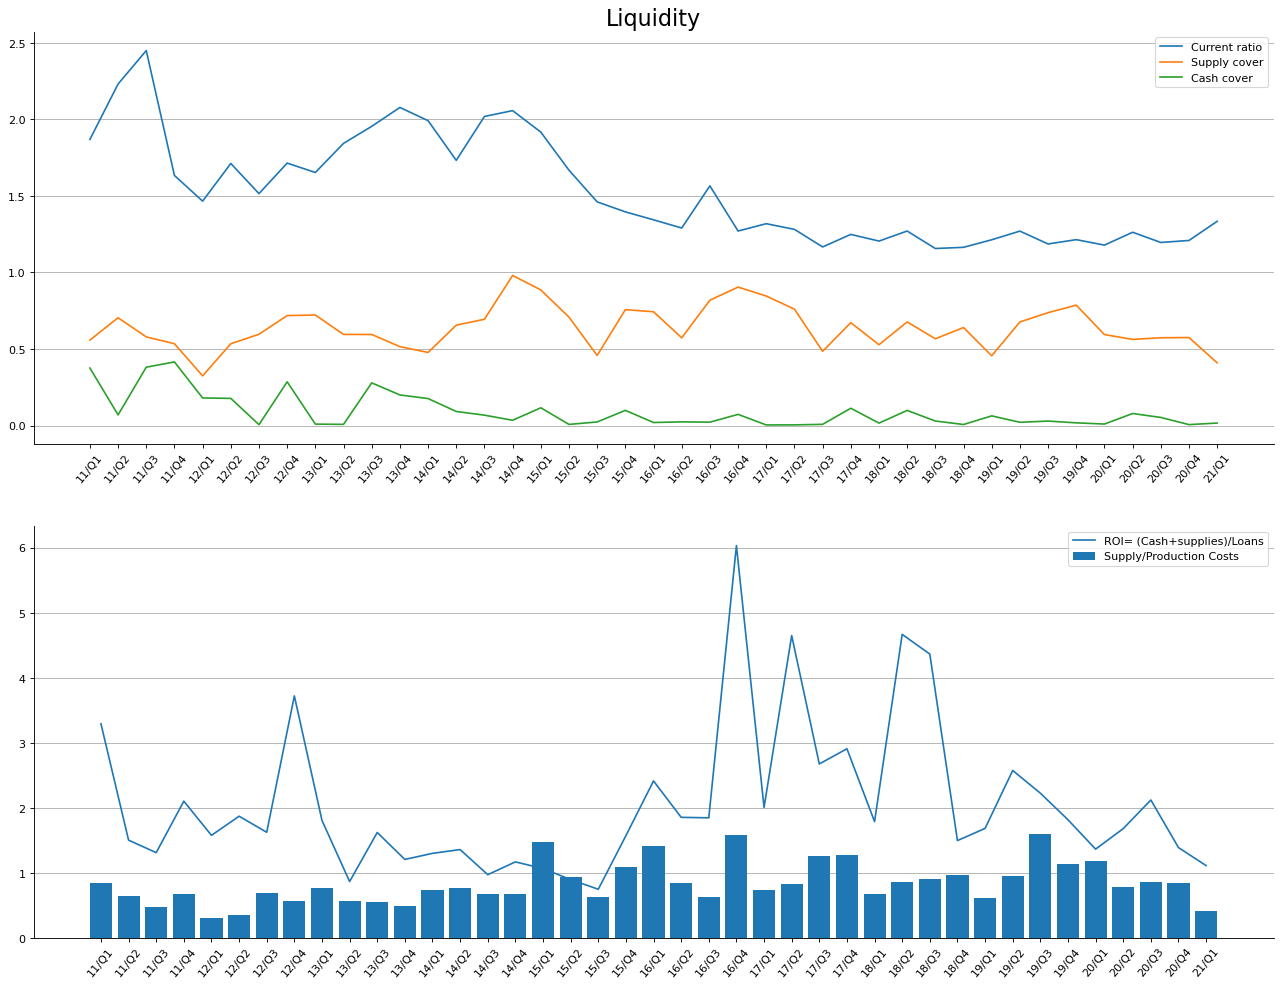

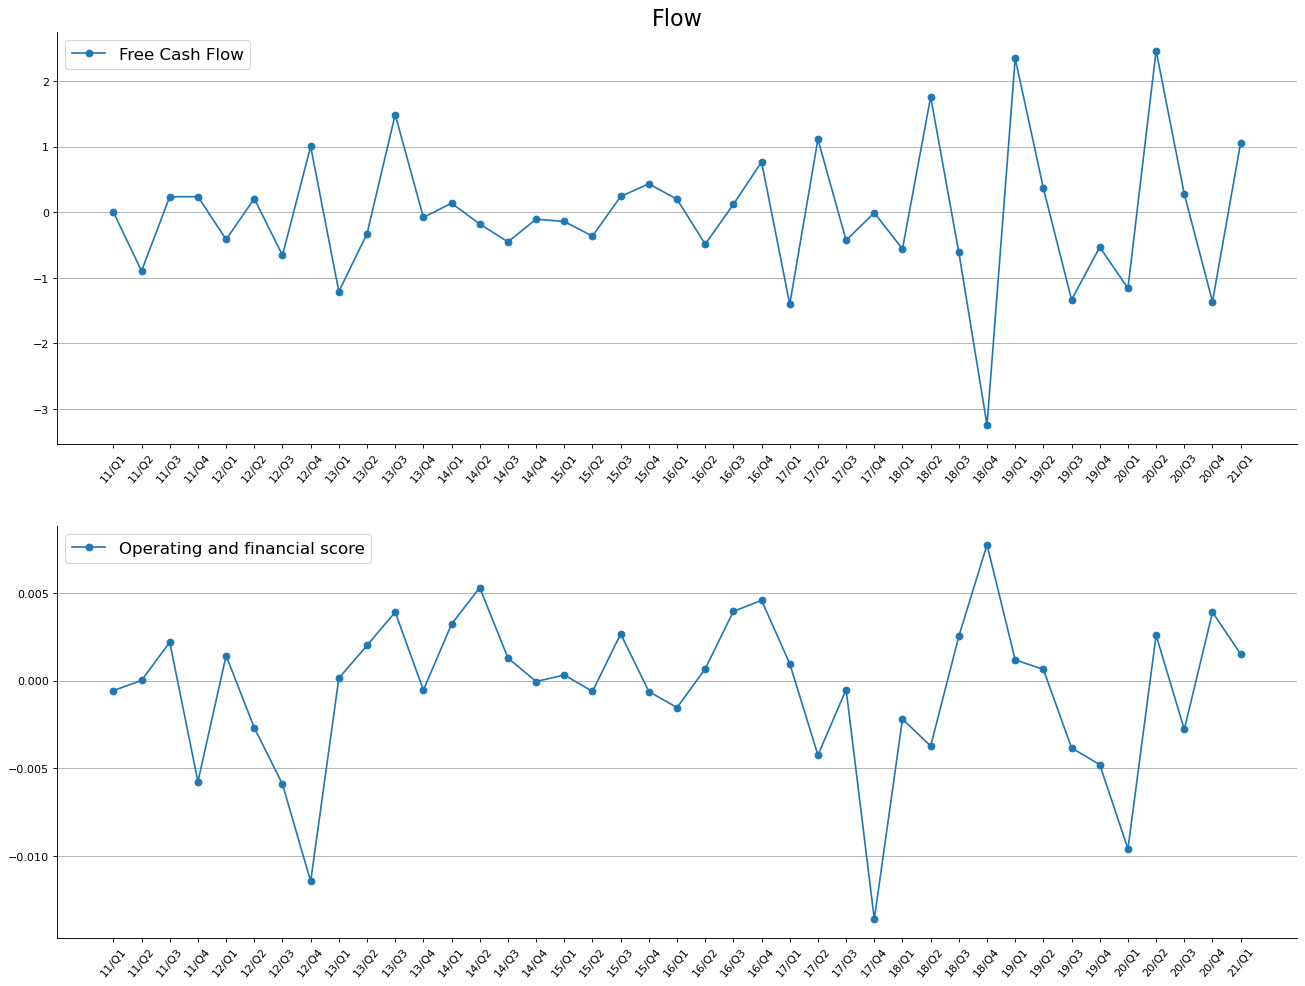

In [13]:
fin = ZIS(df) 
display(fin.equity())
display(fin.Assets())
display(fin.Cover())
display(fin.Flow())